In [7]:
# ============================================================================
# COMPLETE SVM IMPLEMENTATION 
# ============================================================================

# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve,
                             average_precision_score)
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [8]:
# ============================================================================
#  LOAD DATA
# ============================================================================

print("="*60)
print("SVM FOR DIABETES PREDICTION")
print("="*60)

df = pd.read_csv('diabetes.csv')

print("\n Data Information:")
print(f"Data size: {df.shape}")
print(f"\nClass distribution:\n{df['Outcome'].value_counts()}")
print(f"\nPositive class percentage: {(df['Outcome'].mean()*100):.1f}%")


SVM FOR DIABETES PREDICTION

 Data Information:
Data size: (768, 9)

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Positive class percentage: 34.9%


In [9]:
# ============================================================================
#  DATA PREPROCESSING
# ============================================================================

print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_columns:
    df[col] = df[col].replace(0, df[col].median())

print("✓ Zero values replaced with median")



DATA PREPROCESSING
✓ Zero values replaced with median


In [10]:
# ============================================================================
#  DATA SPLITTING
# ============================================================================

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Train set: {X_train.shape}")
print(f"✓ Test set: {X_test.shape}")



✓ Train set: (614, 8)
✓ Test set: (154, 8)


In [11]:
# ============================================================================
#  FEATURE SCALING
# ============================================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled")


✓ Features scaled


In [12]:
# ============================================================================
#  SVM MODEL TRAINING
# ============================================================================

print("\n" + "="*60)
print("TRAINING SVM MODEL")
print("="*60)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

svm = GridSearchCV(
    SVC(random_state=42, probability=True, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=0
)

svm.fit(X_train_scaled, y_train)

print(f"✓ Best parameters: {svm.best_params_}")
print(f"✓ Best CV score: {svm.best_score_:.3f}")

best_svm = svm.best_estimator_



TRAINING SVM MODEL


✓ Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
✓ Best CV score: 0.675


In [13]:
# ============================================================================
#  PREDICTIONS
# ============================================================================

y_pred = best_svm.predict(X_test_scaled)
y_pred_proba = best_svm.predict_proba(X_test_scaled)[:, 1]


In [14]:
# ============================================================================
#  COMPREHENSIVE EVALUATION
# ============================================================================

print("\n" + "="*50)
print(" COMPREHENSIVE SVM MODEL EVALUATION")
print("="*50)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n Main Metrics:")
print(f" Accuracy: {accuracy:.3f}")
print(f" Precision: {precision:.3f}")
print(f" Recall: {recall:.3f}")
print(f" F1-Score: {f1:.3f}")

print(f"\n Complete Classification Report:")
print(classification_report(
    y_test, y_pred, 
    target_names=['No Diabetes', 'Has Diabetes'],
    digits=3
))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n Confusion Matrix Details:")
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")

specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0

print(f"\n Additional Metrics:")
print(f"Specificity: {specificity:.3f}")
print(f"Negative Predictive Value (NPV): {npv:.3f}")



 COMPREHENSIVE SVM MODEL EVALUATION

 Main Metrics:
 Accuracy: 0.753
 Precision: 0.618
 Recall: 0.778
 F1-Score: 0.689

 Complete Classification Report:
              precision    recall  f1-score   support

 No Diabetes      0.860     0.740     0.796       100
Has Diabetes      0.618     0.778     0.689        54

    accuracy                          0.753       154
   macro avg      0.739     0.759     0.742       154
weighted avg      0.775     0.753     0.758       154


 Confusion Matrix Details:
True Positive (TP): 42
True Negative (TN): 74
False Positive (FP): 26
False Negative (FN): 12

 Additional Metrics:
Specificity: 0.740
Negative Predictive Value (NPV): 0.860



VISUALIZATION SECTION


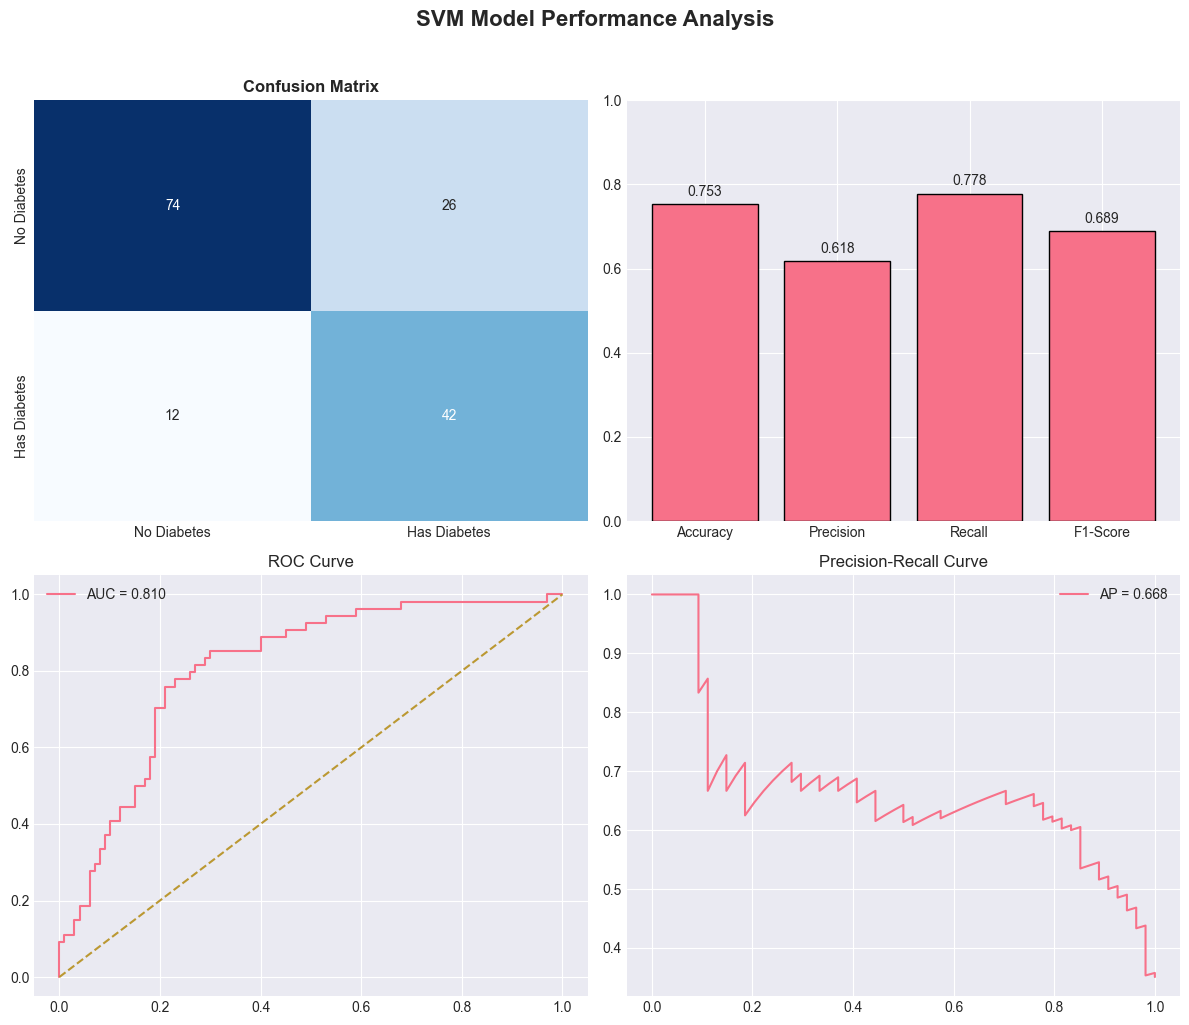

In [15]:
# ============================================================================
# VISUALIZATION SECTION
# ============================================================================

print("\n" + "="*60)
print("VISUALIZATION SECTION")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('SVM Model Performance Analysis', fontsize=16, fontweight='bold', y=1.02)

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix', fontweight='bold')
axes[0, 0].set_xticklabels(['No Diabetes', 'Has Diabetes'])
axes[0, 0].set_yticklabels(['No Diabetes', 'Has Diabetes'])

# Metrics Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
bars = axes[0, 1].bar(metrics, values, edgecolor='black')
axes[0, 1].set_ylim(0, 1)

for bar, value in zip(bars, values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, value + 0.02, f'{value:.3f}', ha='center')

# ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
axes[1, 0].plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
axes[1, 0].plot([0,1],[0,1],'--')
axes[1, 0].legend()
axes[1, 0].set_title('ROC Curve')

# Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)
axes[1, 1].plot(recall_vals, precision_vals, label=f'AP = {avg_precision:.3f}')
axes[1, 1].legend()
axes[1, 1].set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()



MODEL INTERPRETATION - FEATURE IMPORTANCE
                 Feature    Importance
                 Glucose  9.025974e-02
                     Age  4.740260e-02
                     BMI  3.441558e-02
DiabetesPedigreeFunction  3.051948e-02
             Pregnancies  2.922078e-02
                 Insulin  8.441558e-03
           BloodPressure  2.220446e-17
           SkinThickness -1.298701e-03


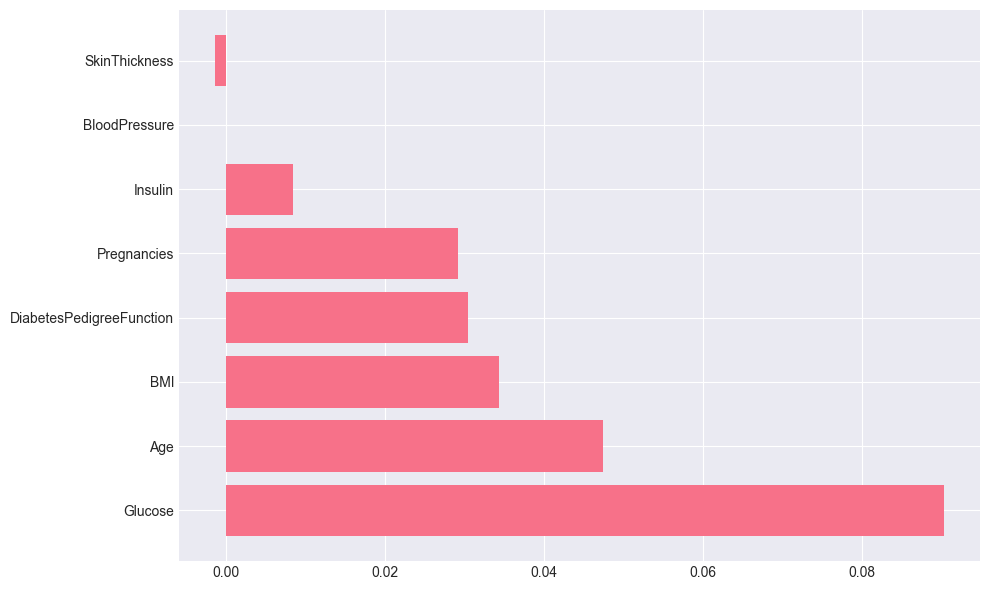

In [16]:
# ============================================================================
#  Feature Importance 
# ============================================================================

print("\n" + "="*60)
print("MODEL INTERPRETATION - FEATURE IMPORTANCE")
print("="*60)

plt.figure(figsize=(10, 6))

if best_svm.kernel == 'linear':
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_svm.coef_[0],
        'Abs_Coefficient': np.abs(best_svm.coef_[0])
    }).sort_values('Abs_Coefficient', ascending=False)

    print(coefficients.drop('Abs_Coefficient', axis=1).to_string(index=False))
    plt.barh(coefficients['Feature'], coefficients['Coefficient'])
else:
    perm_importance = permutation_importance(
        best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42
    )
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values('Importance', ascending=False)

    print(feature_importance.to_string(index=False))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])

plt.tight_layout()
plt.show()



THRESHOLD ANALYSIS

Threshold | Precision | Recall | F1-Score
----------------------------------------
0.3       | 0.575     | 0.852  | 0.687
0.4       | 0.618     | 0.778  | 0.689
0.5       | 0.633     | 0.574  | 0.602
0.6       | 0.657     | 0.426  | 0.517
0.7       | 0.714     | 0.278  | 0.400


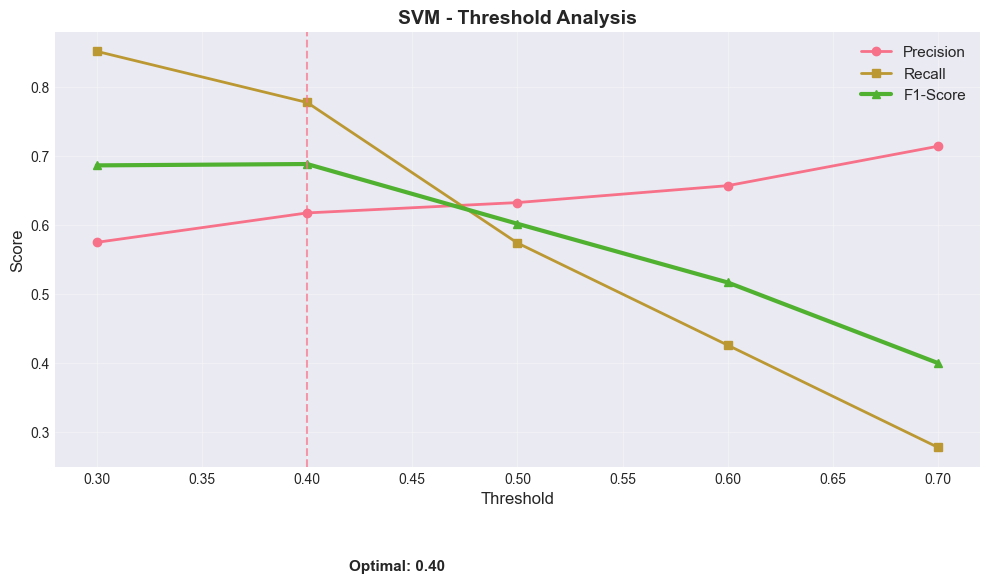

In [17]:
# ============================================================================
#   Threshold Analysis 
# ============================================================================

print("\n" + "="*60)
print("THRESHOLD ANALYSIS")
print("="*60)

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
print("\nThreshold | Precision | Recall | F1-Score")
print("-" * 40)

precisions = []
recalls = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    p = precision_score(y_test, y_pred_thresh, zero_division=0)
    r = recall_score(y_test, y_pred_thresh)
    f = f1_score(y_test, y_pred_thresh)
    
    precisions.append(p)
    recalls.append(r)
    f1_scores.append(f)
    
    print(f"{thresh:.1f}       | {p:.3f}     | {r:.3f}  | {f:.3f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, lw=2, label='Precision', marker='o')
plt.plot(thresholds, recalls, lw=2, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, lw=3, label='F1-Score', marker='^')

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('SVM - Threshold Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
plt.axvline(x=optimal_threshold, linestyle='--', alpha=0.7)
plt.text(optimal_threshold + 0.02, 0.1,
         f'Optimal: {optimal_threshold:.2f}',
         fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



PROBABILITY DISTRIBUTION ANALYSIS


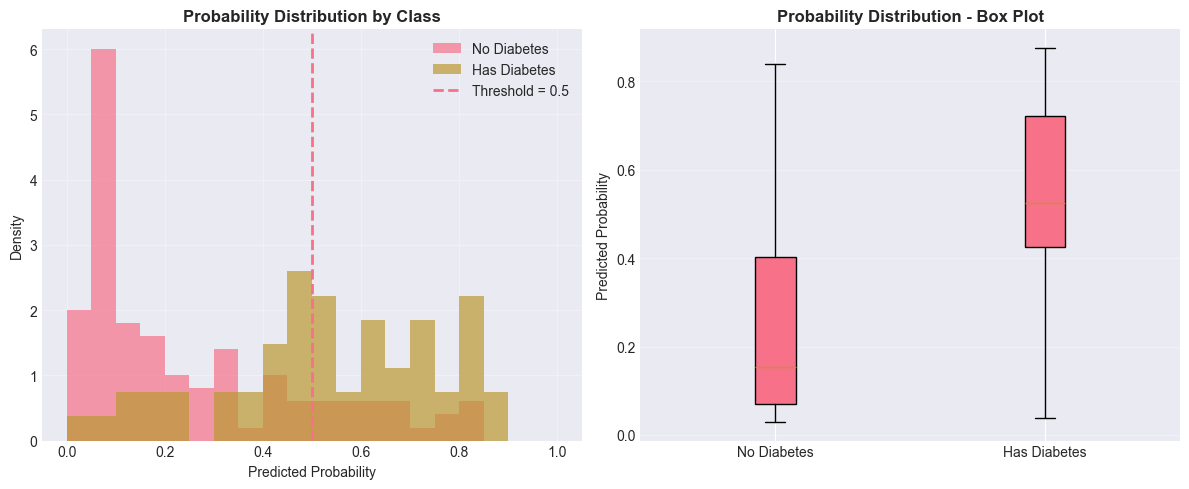

In [18]:
# ============================================================================
#   Probability Distribution
# ============================================================================

print("\n" + "="*60)
print("PROBABILITY DISTRIBUTION ANALYSIS")
print("="*60)

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
bins = np.linspace(0, 1, 21)
plt.hist(y_pred_proba[y_test == 0], bins=bins, alpha=0.7,
         label='No Diabetes', density=True)
plt.hist(y_pred_proba[y_test == 1], bins=bins, alpha=0.7,
         label='Has Diabetes', density=True)
plt.axvline(x=0.5, linestyle='--', linewidth=2, label='Threshold = 0.5')

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Probability Distribution by Class', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Box Plot
plt.subplot(1, 2, 2)
data_to_plot = [y_pred_proba[y_test == 0], y_pred_proba[y_test == 1]]
plt.boxplot(data_to_plot, patch_artist=True,
            labels=['No Diabetes', 'Has Diabetes'])

plt.ylabel('Predicted Probability')
plt.title('Probability Distribution - Box Plot', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()



ERROR ANALYSIS


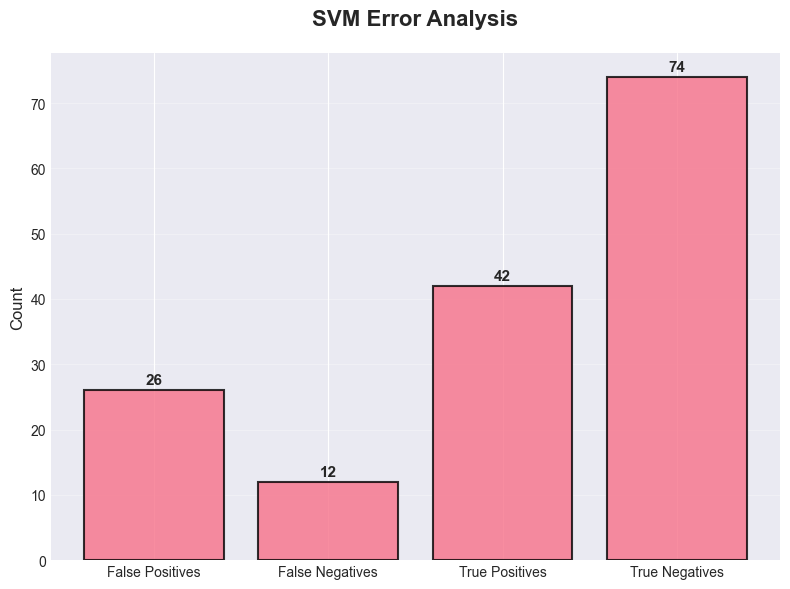

In [19]:
# ============================================================================
#    Error Analysis
# ============================================================================

print("\n" + "="*60)
print("ERROR ANALYSIS")
print("="*60)

plt.figure(figsize=(8, 6))

error_types = ['False Positives', 'False Negatives',
               'True Positives', 'True Negatives']
error_counts = [fp, fn, tp, tn]

bars = plt.bar(error_types, error_counts,
               edgecolor='black', linewidth=1.5, alpha=0.8)

plt.title('SVM Error Analysis', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, error_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             str(count), ha='center', va='bottom',
             fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



CLASS DISTRIBUTION


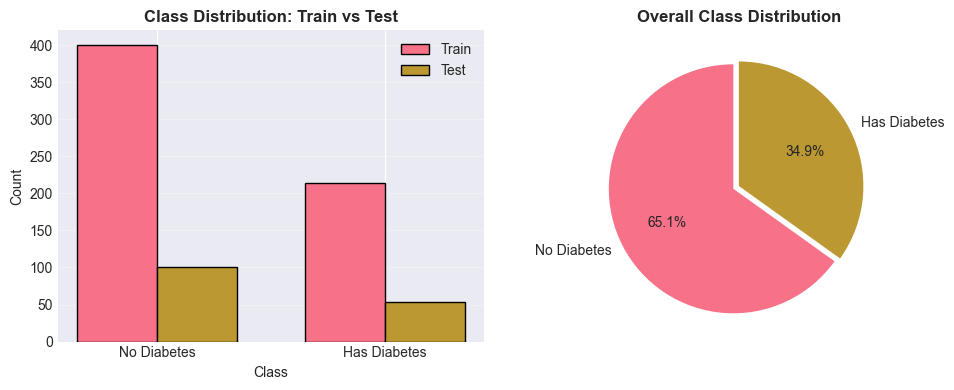

In [20]:
# ============================================================================
#   Class Distribution
# ============================================================================

print("\n" + "="*60)
print("CLASS DISTRIBUTION")
print("="*60)

plt.figure(figsize=(10, 4))

# Train vs Test
plt.subplot(1, 2, 1)
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

x = np.arange(2)
width = 0.35

plt.bar(x - width/2, train_counts.values, width,
        label='Train', edgecolor='black')
plt.bar(x + width/2, test_counts.values, width,
        label='Test', edgecolor='black')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Train vs Test', fontweight='bold')
plt.xticks(x, ['No Diabetes', 'Has Diabetes'])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Pie chart
plt.subplot(1, 2, 2)
class_counts = df['Outcome'].value_counts()

plt.pie(class_counts,
        labels=['No Diabetes', 'Has Diabetes'],
        autopct='%1.1f%%',
        startangle=90,
        explode=(0.05, 0))

plt.title('Overall Class Distribution', fontweight='bold')

plt.tight_layout()
plt.show()


In [21]:
# ============================================================================
#  FINAL SUMMARY
# ============================================================================

print("\n" + "="*50)
print(" RESULTS SUMMARY")
print("="*50)

print(f"\n Model Strengths:")
if recall > 0.7:
    print(f"  • High Recall ({recall:.3f})")
if precision > 0.7:
    print(f"  • High Precision ({precision:.3f})")
if f1 > 0.7:
    print(f"  • Good balance (F1-Score: {f1:.3f})")

print(f"\n Areas for Improvement:")
if fp > fn:
    print(f"  • {fp} False Positives")
if fn > fp:
    print(f"  • {fn} False Negatives")

print(f"\n Recommendation:")
if recall < precision:
    print("  • Lower the threshold to catch more patients")
else:
    print("  • Increase the threshold to reduce false alarms")



 RESULTS SUMMARY

 Model Strengths:
  • High Recall (0.778)

 Areas for Improvement:
  • 26 False Positives

 Recommendation:
  • Increase the threshold to reduce false alarms


In [22]:
# ============================================================================
# FINAL PERFORMANCE SUMMARY TABLE
# ============================================================================

print("\n" + "="*50)
print(" FINAL PERFORMANCE SUMMARY")
print("="*50)

summary_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score',
               'Specificity', 'NPV', 'ROC-AUC'],
    'Value': [accuracy, precision, recall, f1,
              specificity, npv, roc_auc],
    'Interpretation': [
        'Overall correctness',
        'Correct positive predictions',
        'Ability to find all positives',
        'Balance of Precision and Recall',
        'Ability to identify negatives',
        'Correct negative predictions',
        'Overall classification ability'
    ]
})

print(summary_df.to_string(index=False))

print("\n" + "="*60)
print("✅ ALL VISUALIZATIONS COMPLETED - 9 PLOTS GENERATED")
print("="*60)



 FINAL PERFORMANCE SUMMARY
     Metric    Value                  Interpretation
   Accuracy 0.753247             Overall correctness
  Precision 0.617647    Correct positive predictions
     Recall 0.777778   Ability to find all positives
   F1-Score 0.688525 Balance of Precision and Recall
Specificity 0.740000   Ability to identify negatives
        NPV 0.860465    Correct negative predictions
    ROC-AUC 0.809630  Overall classification ability

✅ ALL VISUALIZATIONS COMPLETED - 9 PLOTS GENERATED



SVM DECISION BOUNDARY VISUALIZATION (PCA)


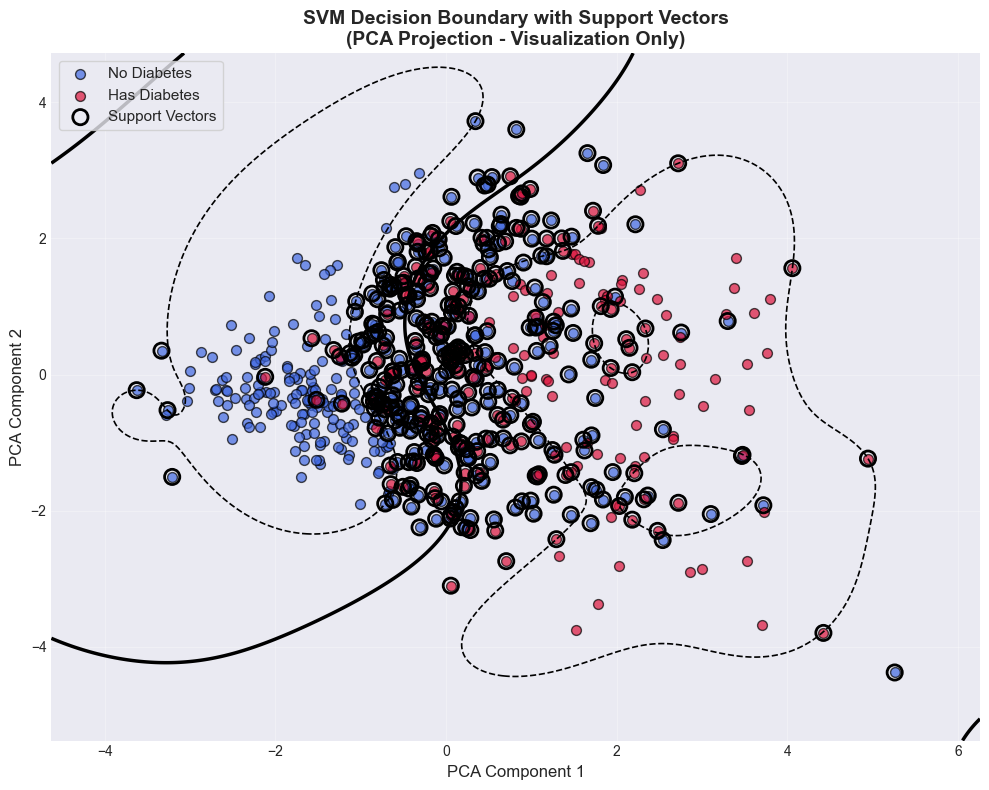

In [23]:
# ============================================================================
#  CLEAN SVM DECISION BOUNDARY VISUALIZATION (PCA - FULL & FIXED)
# ============================================================================

from sklearn.decomposition import PCA

print("\n" + "="*60)
print("SVM DECISION BOUNDARY VISUALIZATION (PCA)")
print("="*60)

# 1. PCA to 2D (visualization only)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_train_scaled)

# 2. Train SVM on PCA data

svm_vis = SVC(
    kernel=best_svm.kernel,
    C=best_svm.C,
    gamma=best_svm.gamma,
    class_weight='balanced'
)
svm_vis.fit(X_pca, y_train)


# 3. Create mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# 4. Decision function values
Z = svm_vis.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot
plt.figure(figsize=(10, 8))

# Decision boundary & margins
plt.contour(
    xx, yy, Z,
    levels=[-1, 0, 1],
    linestyles=['--', '-', '--'],
    linewidths=[1.2, 2.5, 1.2],
    colors='black'
)

# Classes
plt.scatter(
    X_pca[y_train == 0, 0],
    X_pca[y_train == 0, 1],
    c='royalblue',
    edgecolor='k',
    s=50,
    alpha=0.7,
    label='No Diabetes'
)

plt.scatter(
    X_pca[y_train == 1, 0],
    X_pca[y_train == 1, 1],
    c='crimson',
    edgecolor='k',
    s=50,
    alpha=0.7,
    label='Has Diabetes'
)

# Support vectors
plt.scatter(
    svm_vis.support_vectors_[:, 0],
    svm_vis.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='black',
    linewidths=2,
    label='Support Vectors'
)

# Labels
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.title(
    'SVM Decision Boundary with Support Vectors\n(PCA Projection - Visualization Only)',
    fontsize=14,
    fontweight='bold'
)

plt.legend(loc='upper left', fontsize=11, frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
